In [1]:
# networkxと描画のためのmatplotlibのpyplotの読み込み
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pickle

In [3]:
men_toilet_ls = list(range(6,17,2)) + list(range(18,26))
women_toilet_ls = list(range(7,20,2)) + list(range(21,26))
women_toilet_ls

[7, 9, 11, 13, 15, 17, 19, 21, 22, 23, 24, 25]

In [4]:
stair_length = 10

### 変えるところ

In [5]:
#トイレ間を何分割するか
num_node = 5
#各トイレのしまっている確率を書く
#全部0.1だったら
#possibility = np.ones(26) * 0.1 でいける
#下は6~11番が90%閉まってる時
unable = 0.5
possibility = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
possibility = np.ones(26) * unable
#他に行く確率
q = 0.5
#男性を調べるか女性を調べるか
#男性だったらTrue, 女性だったらFalse
is_man = True

cost_stairs = 0.5

stop_stress = 15

In [6]:
sex = "man" if is_man else "women"
file_name = "%s_unable%0.1f_notwait%0.1f_coststair%0.1f_stopstress%0.1f"%(sex, unable, q, cost_stairs, stop_stress)
file_name

'man_unable0.5_notwait0.5_coststair0.5_stopstress15.0'

In [7]:
def make_edge_ls(num_split):
    df = pd.read_csv("data/ToTo.csv", header=None)
    df = df[df.iloc[:,2] == 10]
    edge_ls = df.values.tolist()
    for i in range(19):
        edge_ls.append((i, i + 26, 2))

    for i in range(26, 44 + 19 * (num_split - 3) + 1):
        edge_ls.append((i, i+19, 2))
    for i, j in zip(range(26 + 19 * (num_split -2), 
                      44 + 19 * (num_split - 2) + 1), list(range(6, 12)) + list(range(13,26))):
        edge_ls.append((i,j,2))
    return edge_ls

def make_xyz(num_split, e=30):
    e = e / num_split
    add_node_ls = []
    for i in range(1, num_split):
        add_node_ls += [e * i] * 6 + [e * i + 30] * 6 + [e * i + 60] * 7
    xyz = pd.read_csv("data/ToTo_nodesxy.csv", header=None)
    new_xyz = pd.concat([xyz.iloc[:26,:], pd.DataFrame({1 : xyz.iloc[26:,1].tolist() * (num_split - 1),
             0 : add_node_ls})])
    new_xyz.index = range(new_xyz.shape[0])
    return new_xyz.values

In [8]:
def make_color_ls(men_toilet_ls, women_toilet_ls, nnodes):
    both = set(men_toilet_ls) & set(women_toilet_ls)
    color_ls = []
    for node in range(nnodes):
        if node in both:
            color_ls.append("purple")
        elif node in men_toilet_ls:
            color_ls.append("blue")
        elif node in women_toilet_ls:
            color_ls.append("red")
        else:
            color_ls.append("lightgray")
    return color_ls

/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:861: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


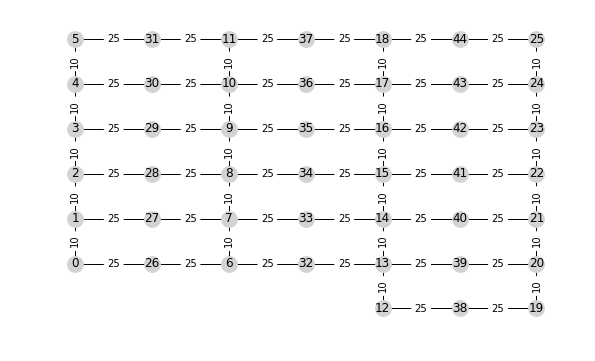

In [9]:
# データファイルから係数を取得
csv_file_nodes = open("data/ToTo_nodesxy.csv", "r")
csv_file_edges = open("data/ToTo.csv", "r")
f_node = csv.reader(csv_file_nodes)
f_edge = csv.reader(csv_file_edges)

# 枝の長さの読み込み
elist = []
weighted_elist = []
for i, row in enumerate(f_edge):
    elist += [(int(row[0]), int(row[1]))]
    weighted_elist += [(int(row[0]), int(row[1]), int(row[2]))]

# 頂点座標の読み込み
p = dict()
for i, row in enumerate(f_node):
    p[i] = (float(row[0]), float(row[1]))
nnodes = len(p) # ノード数をnnodesとする

G = nx.Graph()
G.add_weighted_edges_from(weighted_elist)
G.node = {i : j for i, j in sorted(G.node.items(), key=lambda x:x[0])}
elbs = {(u,v):G[u][v]['weight'] for (u,v) in G.edges()}

#mst = prim(G)
#print("最小木を構成する枝集合:",mst)
fig = plt.figure(figsize=(10,6))
nx.draw_networkx(G, pos=p, node_color='lightgray', node_size=250, width=1)
#nx.draw_networkx_edges(G, pos=p, edge_color='blue', edgelist=mst, width=5)
nx.draw_networkx_edge_labels(G, pos=p, edge_labels=elbs)
plt.axis('off')
plt.show(fig)
plt.close(fig)

#グラフを生成
#G = nx.DiGraph()
#G.add_nodes_from(node_list)
#G.add_weighted_edges_from(weighted_elist)
#labels = nx.get_edge_attributes(G,'weight')

#グラフ描画
#双方向の重みが表示されないことについては一時保留
#nx.draw_networkx(G, pos=p, node_color='lightgray', node_size=500, width=1)
#nx.draw_networkx_edge_labels(G,p,edge_labels=labels)

In [10]:
f_edge = make_edge_ls(num_node)
f_node = make_xyz(num_node)
nnodes = len(f_node)

In [33]:
color_ls = make_color_ls(men_toilet_ls, women_toilet_ls, nnodes)

/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:861: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


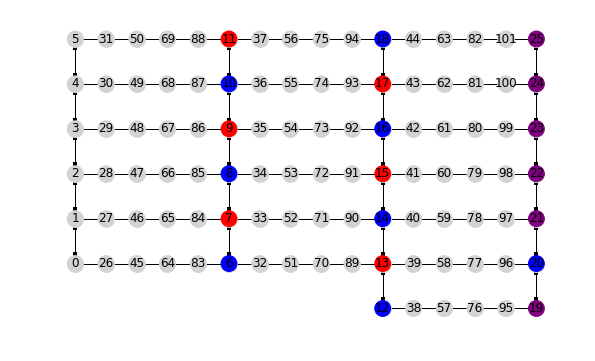

In [12]:

# 枝の長さの読み込み
elist = []
weighted_elist = []
for i, row in enumerate(f_edge):
    elist += [(int(row[0]), int(row[1]))]
    elist += [(int(row[1]), int(row[0]))]
    if int(row[2]) == stair_length:
        weighted_elist += [(int(row[0]), int(row[1]), int(row[2]))]
        weighted_elist += [(int(row[1]), int(row[0]), int(row[2]))]
    else:
        weighted_elist += [(int(row[0]), int(row[1]), int(row[2]) * (1 - cost_stairs))]
        weighted_elist += [(int(row[1]), int(row[0]), int(row[2]) * (1 + cost_stairs))]

# 頂点座標の読み込み
p = dict()
for i, row in enumerate(f_node):
    p[i] = (float(row[0]), float(row[1]))
nnodes = len(p) # ノード数をnnodesとする

G = nx.DiGraph()
G.add_weighted_edges_from(weighted_elist)
G.node = {i : j for i, j in sorted(G.node.items(), key=lambda x:x[0])}
elbs = {(u,v):G[u][v]['weight'] for (u,v) in G.edges()}

#mst = prim(G)
#print("最小木を構成する枝集合:",mst)
fig = plt.figure(figsize=(10,6))
nx.draw_networkx(G, pos=p, node_color='lightgray', node_size=250, width=1)
nx.draw_networkx_nodes(G, pos=p, node_color=color_ls, node_size=250, width=1)
#nx.draw_networkx_edges(G, pos=p, edge_color='blue', edgelist=mst, width=5)
_elbs = {i:"" for i,j in elbs.items()}
nx.draw_networkx_edge_labels(G, pos=p, edge_labels=_elbs)
plt.axis('off')
plt.show(fig)
plt.close(fig)

In [13]:
"""
# 枝の長さの読み込み
elist = []
weighted_elist = []
for i, row in enumerate(f_edge):
    elist += [(int(row[0]), int(row[1]))]
    weighted_elist += [(int(row[0]), int(row[1]), int(row[2]))]

# 頂点座標の読み込み
p = dict()
for i, row in enumerate(f_node):
    p[i] = (float(row[0]), float(row[1]))
nnodes = len(p) # ノード数をnnodesとする

G = nx.Graph()
G.add_weighted_edges_from(weighted_elist)
G.node = {i : j for i, j in sorted(G.node.items(), key=lambda x:x[0])}
elbs = {(u,v):G[u][v]['weight'] for (u,v) in G.edges()}

#mst = prim(G)
#print("最小木を構成する枝集合:",mst)
fig = plt.figure(figsize=(10,6))
nx.draw_networkx(G, pos=p, node_color='lightgray', node_size=250, width=1)
#nx.draw_networkx_edges(G, pos=p, edge_color='blue', edgelist=mst, width=5)
nx.draw_networkx_edge_labels(G, pos=p, edge_labels=elbs)
plt.axis('off')
plt.show(fig)
plt.close(fig)
"""

'\n# 枝の長さの読み込み\nelist = []\nweighted_elist = []\nfor i, row in enumerate(f_edge):\n    elist += [(int(row[0]), int(row[1]))]\n    weighted_elist += [(int(row[0]), int(row[1]), int(row[2]))]\n\n# 頂点座標の読み込み\np = dict()\nfor i, row in enumerate(f_node):\n    p[i] = (float(row[0]), float(row[1]))\nnnodes = len(p) # ノード数をnnodesとする\n\nG = nx.Graph()\nG.add_weighted_edges_from(weighted_elist)\nG.node = {i : j for i, j in sorted(G.node.items(), key=lambda x:x[0])}\nelbs = {(u,v):G[u][v][\'weight\'] for (u,v) in G.edges()}\n\n#mst = prim(G)\n#print("最小木を構成する枝集合:",mst)\nfig = plt.figure(figsize=(10,6))\nnx.draw_networkx(G, pos=p, node_color=\'lightgray\', node_size=250, width=1)\n#nx.draw_networkx_edges(G, pos=p, edge_color=\'blue\', edgelist=mst, width=5)\nnx.draw_networkx_edge_labels(G, pos=p, edge_labels=elbs)\nplt.axis(\'off\')\nplt.show(fig)\nplt.close(fig)\n'

In [14]:
num_node = len(G.node)

In [15]:
all_length=np.zeros((num_node, 26))
all_path=np.zeros((num_node, 26),dtype=object)

In [16]:
for i in range(num_node):
    for j in range(26):
        length=nx.dijkstra_path_length(G,i,j)
        path=nx.dijkstra_path(G,i,j)
        all_length[i,j]=length
        all_path[i,j]=path    

In [17]:
all_length

array([[ 0., 10., 20., ..., 45., 55., 65.],
       [10.,  0., 10., ..., 35., 45., 55.],
       [20., 10.,  0., ..., 25., 35., 45.],
       ...,
       [72., 62., 52., ...,  1., 11., 21.],
       [82., 72., 62., ..., 11.,  1., 11.],
       [92., 82., 72., ..., 21., 11.,  1.]])

In [18]:
dijkstra_info = dict()
for i in range(num_node):
    for j in range(26):
        length=nx.dijkstra_path_length(G,i,j)
        path=nx.dijkstra_path(G,i,j)
        dijkstra_info[(i,j)] = [path, length]

In [19]:
men_D = all_length.copy()
women_D = all_length.copy()
men_mask = np.zeros_like(men_D)
women_mask = np.zeros_like(women_D)
men_mask[:,men_toilet_ls] = 1
women_mask[:,women_toilet_ls] = 1
men_D = men_D * men_mask
women_D = women_D * women_mask

In [20]:
men_D[men_D==0] = np.inf
women_D[women_D==0] = np.inf

In [21]:
def dijkstra_simulation(dijkstra_info, D, start_point, p=None, q=0, stop_stress=0):
    """
    Input
    ======
    dijkstra_info : dict
        {(source, target) : [root, cost]}
    D : np.ndarray
        距離行列
    start_point : int
        出発地点
    p : np.ndarray
        各トイレの空いてない確率
    q : float
        トイレに行きたい人のしまっていた時に他を探す確率
    stop_stress : float
        トイレがしまっていた時のストレス
        
    Return
    =======
    cost : float
        シミュレーションを行った結果のストレス(移動距離)
    sources : list
        シミュレーションを行った結果の移動経路
    """
    _D = D.copy()
    if p is None:
        p = np.zeros(D.shape[1])
    s = start_point
    sources = list()
    cost = 0
    while True:
        t = np.argmin(_D[s,:])
        (source, c) = dijkstra_info[(s,t)]
        cost += c
        sources.extend(source[1:])
        if np.random.rand() < p[t]:
            cost += stop_stress
            if np.random.rand() > q:
                break
        else:
            break
        _D[:,t] = np.inf
        s = t
    return cost, sources

### テスト

In [22]:
dijkstra_simulation(dijkstra_info, men_D, start_point=28)

(4.0, [47, 66, 85, 8])

In [23]:
dijkstra_simulation(dijkstra_info, women_D, start_point=28, p = np.ones(26) * 0.5, q=0.9)

(9.0, [47, 66, 85, 8, 34, 53, 72, 91, 15])

### シミュレーション

In [24]:
epochs = 1000
all_cost_ls = list()
if is_man:
    D = men_D.copy()
else:
    D = women_D.copy()
for start_point in range(26, num_node):
    cost_ls = list()
    for epoch in range(epochs):
        (cost, source) = dijkstra_simulation(dijkstra_info, D, start_point, possibility, q, stop_stress=stop_stress)
        cost_ls.append(cost)
    all_cost_ls.append([np.mean(cost_ls), np.std(cost_ls)])

In [25]:
std_ls = [i[1] for i in all_cost_ls]
all_cost_ls = [i[0] for i in all_cost_ls]

In [26]:
norm = MinMaxScaler()
costs = norm.fit_transform(np.array(all_cost_ls).reshape(-1,1)).flatten()

In [27]:
nx.set_node_attributes(G, "cost", {i : j for i, j in enumerate(costs)})

In [28]:
#pickle.dump(im,open("sample_im.bin", "wb"))

In [29]:
im = pickle.load(open("sample_im.bin", "rb"))
fig.colorbar(im)

/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/figure.py:1689: UserWarning: This figure was saved with matplotlib version 2.1.0 and is unlikely to function correctly.
  (version, ))


### 結果の出力

- 値は大きいほどストレスが高い

In [30]:
_elbs = {i : "" for i in elbs.keys()}

In [31]:
import matplotlib
matplotlib.matplotlib_fname()

'/Users/masakitashiro/.matplotlib/matplotlibrc'

/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:861: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


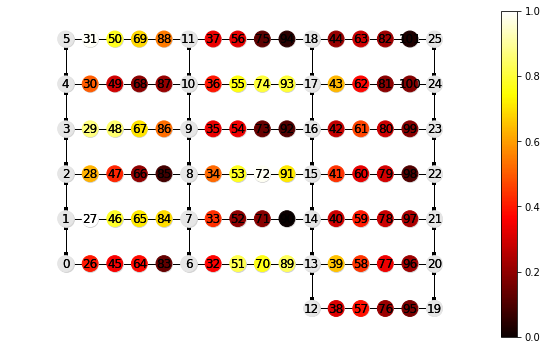

In [32]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
nx.draw_networkx(G, pos=p, node_color="lightgray", node_size=250, width=1)
#nx.draw_networkx(G, pos=p, node_color=colors, node_size=250, width=1, cmap=plt.cm.jet)
nx.draw_networkx(G, pos=p, node_color=np.vstack([np.ones((26,4)) * 0.9, plt.cm.hot(costs)]), node_size=250, width=1, cmap=plt.cm.hot)
#nx.draw_networkx_nodes(G, p, node_color=np.vstack([np.ones((26,4)), plt.cm.hot(costs)]), 
#                            cmap=plt.cm.hot)
#nx.draw_networkx_edges(G, pos=p, edge_color='blue', edgelist=mst, width=5)
nx.draw_networkx_edge_labels(G, pos=p, edge_labels=_elbs)
plt.axis('off')
fig.colorbar(im)
#plt.savefig("data/"+file_name+".png")
plt.show(fig)
plt.close(fig)